In [17]:
#!pip install fastai --upgrade
#from fastai.vision.all import *

In [27]:
# Import required modules
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from torchvision.datasets import Cityscapes # PyTorch API for CityScapes data

%matplotlib inline

## Loading and Exploring Data

In [41]:
cityscapes_dir = "/content/drive/MyDrive/Career Materials 2020/fellowship.ai"\
"/data"

train_image_transforms = transforms.Compose([transforms.ToTensor()])
train_target_transforms = transforms.Compose([transforms.ToTensor()])

dataset = Cityscapes(cityscapes_dir, split='train', mode='fine', 
                     target_type='semantic', transform=train_image_transforms,
                     target_transform=train_target_transforms)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

In [125]:
def plot_image_mask_pair(dataloader):
  """ Plot image and mask pair from a randomly selected image in a mini-batch

  Arguments
    dataset: PyTorch Dataset object

  Returns
    None
  """
  # Create mini-batch and extract images and masks
  image_mask_batch = iter(dataloader)
  images, masks = next(image_mask_batch)

  # Create random index to select into the mini-batch
  batch_size = len(images)
  idx = np.random.randint(0, batch_size)

  # Transform Tensor Image to Numpy Image
  image = images[idx].numpy().transpose((1,2,0))
  mask = masks[idx].numpy().transpose((1,2,0)).squeeze()

  # Plot
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
  ax1.imshow(image)
  ax1.axis('off')
  ax2.imshow(mask)
  ax2.axis('off')

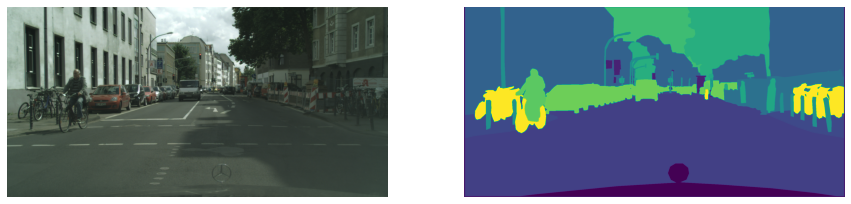

In [126]:
plot_image_mask_pair(train_loader)

TypeError: ignored